#Thông tin sinh viên:

Họ tên: Huỳnh Võ Ngọc Thanh

MSSV: 21520449

#Bài 2: Sử dụng Numpy xây dựng phương pháp Logistic Regression và Gradient Descent. Tiến hành huấn luyện phương pháp Logistic Regression và trực quan hoá giá trị của hàm loss trong toàn bộ quá trình huấn luyện.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#Loading data:

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DS102 TH/Lab3/data.csv", sep=";")

In [ ]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
data.shape

(4424, 37)

In [ ]:
data.isna().sum(axis="index")

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
data.duplicated().any()

False

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

#Gộp Enrolled và Dropout thành 0, Graduate thành 1 => 2 lớp

In [ ]:
def LabelEncoder (val:str) -> int:
  if val=="Enrolled" or val=="Dropout":
    return 0

  return 1

In [ ]:
data["Target"] = data["Target"].apply(LabelEncoder)
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


#Biểu đồ cho thấy số lượng nhãn ở 2 lớp

số lượng nhãn tương đối cân bằng

Text(0.5, 1.0, 'Number of samples of each class')

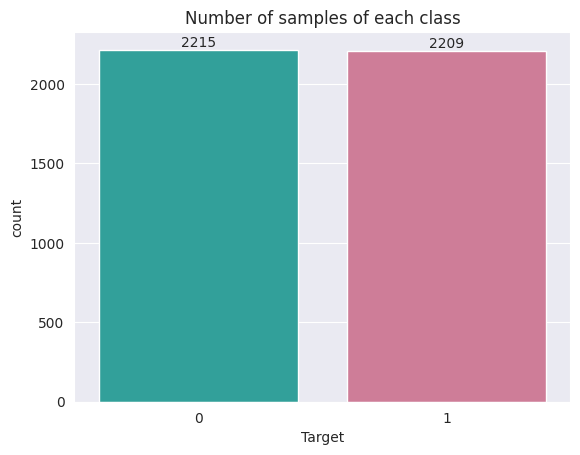

In [ ]:
ax = sns.set_style(style='darkgrid')
palette = {0.0: 'lightseagreen', 1.0: 'palevioletred'}
ax = sns.countplot(data=data, x = 'Target', palette = palette)
ax.bar_label(ax.containers[0])
plt.title("Number of samples of each class")

In [ ]:
X = data.iloc[:, :-1]
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [ ]:
y = data.iloc[:, -1]
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64

In [ ]:
X = np.array(X)
y = np.array(y)

#Chia dữ liệu thành tập train và test:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Chuẩn hóa dữ liệu trên tập đầu vào X:

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.        , 0.        , 0.22222222, ..., 0.15116279, 0.48888889,
        1.        ],
       [0.        , 0.        , 0.11111111, ..., 0.59302326, 1.        ,
        0.31175694],
       [0.        , 0.28571429, 0.33333333, ..., 0.15116279, 0.48888889,
        1.        ],
       ...,
       [0.        , 0.28571429, 0.66666667, ..., 0.20930233, 0.        ,
        0.12417437],
       [0.        , 0.73214286, 0.11111111, ..., 0.91860465, 0.8       ,
        0.        ],
       [0.6       , 0.67857143, 0.11111111, ..., 0.37209302, 0.48888889,
        0.7661823 ]])

#Xây dựng mô hình LogisticRegression và Gradient Descent:

In [ ]:
from tqdm import tqdm
class LogisticRegression:
  def __init__(self, epoch: int, lr: float) -> None:
    self.epoch = epoch
    self.lr = lr
    self.losses = []
    self.metrics = []

  def sigmoid(self, z: np.ndarray) -> np.ndarray:
    return 1/(1 + np.exp(-z))

  def loss_func(self, y: np.ndarray, y_hat: np.ndarray) -> float:
    return -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)).mean()

  def accuracy(self, y: np.ndarray, y_hat: np.ndarray):
    return (1 - np.abs(y - y_hat)).mean()

  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    m = X.shape[0]
    d = X.shape[1]
    self.theta = np.zeros([d,1])
    with tqdm(range(self.epoch)) as pb:
      for e in pb:
        pb.set_description(f"Epoch {e+1}")
        y_hat = self.predict(X)
        diff = y_hat - y
        gradient = 1/m * np.matmul(X.T, diff)
        self.theta = self.theta - self.lr * gradient

        #evaluate
        loss = self.loss_func(y, y_hat)
        acc = self.accuracy(y, y_hat)
        pb.set_postfix({"loss": loss, "acc": acc})
        self.losses.append(loss)
        self.metrics.append(acc)

  def predict(self, X: np.ndarray) -> np.ndarray:
    z = np.matmul(X, self.theta)
    y_hat = self.sigmoid(z)
    return y_hat

#Huấn luyện mô hình:

hiển thị độ mất mát (loss) và độ chính xác (acc)

In [ ]:
logistic_reg = LogisticRegression(100, 0.05)
logistic_reg.fit(X_train, y_train)

Epoch 100: 100%|██████████| 100/100 [01:59<00:00,  1.20s/it, loss=0.0447, acc=0.957]


In [ ]:
logistic_reg.theta

array([[ 0.02441391,  0.02441391,  0.02441391, ...,  0.02441391,
        -0.02441391, -0.02441391],
       [ 0.19858339,  0.19858339,  0.19858339, ...,  0.19858339,
        -0.19858339, -0.19858339],
       [ 0.11594096,  0.11594096,  0.11594096, ...,  0.11594096,
        -0.11594096, -0.11594096],
       ...,
       [ 0.28413944,  0.28413944,  0.28413944, ...,  0.28413944,
        -0.28413944, -0.28413944],
       [ 0.27398545,  0.27398545,  0.27398545, ...,  0.27398545,
        -0.27398545, -0.27398545],
       [ 0.32671982,  0.32671982,  0.32671982, ...,  0.32671982,
        -0.32671982, -0.32671982]])

In [ ]:
y_proba = logistic_reg.predict(X_test)
y_proba

array([[0.96256891, 0.96256891, 0.96256891, ..., 0.96256891, 0.03743109,
        0.03743109],
       [0.95758075, 0.95758075, 0.95758075, ..., 0.95758075, 0.04241925,
        0.04241925],
       [0.95771254, 0.95771254, 0.95771254, ..., 0.95771254, 0.04228746,
        0.04228746],
       ...,
       [0.93471875, 0.93471875, 0.93471875, ..., 0.93471875, 0.06528125,
        0.06528125],
       [0.96769164, 0.96769164, 0.96769164, ..., 0.96769164, 0.03230836,
        0.03230836],
       [0.96693253, 0.96693253, 0.96693253, ..., 0.96693253, 0.03306747,
        0.03306747]])

#Trực quan hóa độ chính xác của mô hình trong quá trình training:

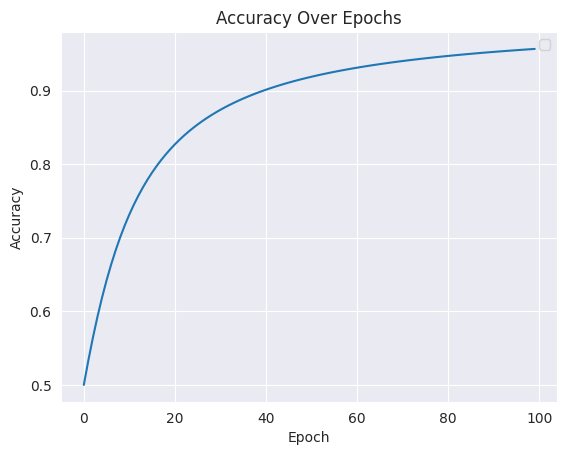

In [ ]:
plt.plot(logistic_reg.metrics)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

#Trực quan hóa giá trị hàm mất mát trong quá trình training:


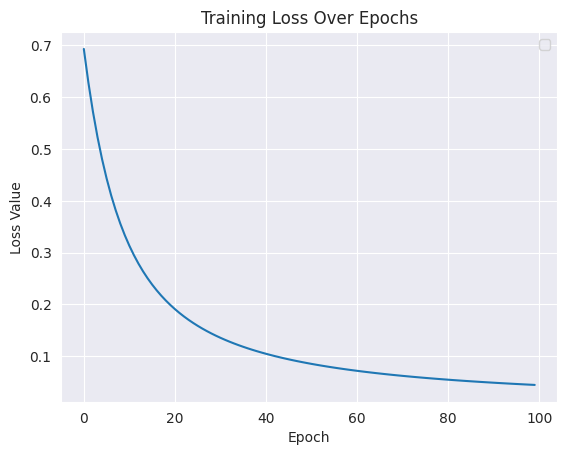

In [ ]:
plt.plot(logistic_reg.losses)
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()